In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [3]:
climate_avg_path = "D:\output.nc"
climate_avg = xr.open_dataset(climate_avg_path)

In [4]:
climate_data = climate_avg['skt']

In [5]:
climate_data

<xarray.DataArray 'skt' (latitude: 1801, longitude: 3600)>
[6483600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0

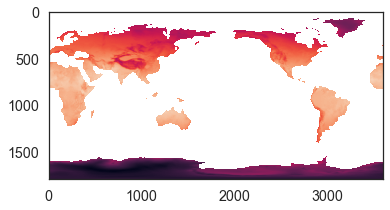

In [6]:
plt.imshow(climate_data)
plt.show()

In [7]:
path = "D:\yearlymean.nc"
temp_xr = xr.open_dataset(path)
temperature_data = temp_xr['skt']

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
#calculate anomalies by subtracting yearly temperature data from average temperature data
anm = (temperature_data - climate_data)

In [20]:
anm.to_netcdf(path= "D:\globalanomalies.nc")

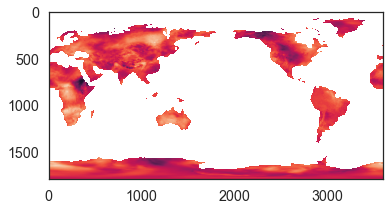

In [14]:
plt.imshow(anm[1])

In [16]:
glob=anm.mean(("longitude", "latitude"), skipna=True)
glob

<xarray.DataArray 'skt' (year: 73)>
array([-0.5504736 , -0.51011866, -0.5036754 , -0.60711044, -1.1122177 ,
       -0.6485722 , -0.4975155 , -0.4533002 , -0.7008198 , -0.3380958 ,
       -0.77088445, -0.7519836 , -0.5064146 , -0.38315088, -0.8508531 ,
       -0.3062094 , -0.744383  , -0.26155195, -0.35649437, -0.52845025,
       -0.6495931 , -0.5552708 , -0.3783289 , -0.09789945, -0.7354241 ,
       -0.8629953 , -0.99805164, -0.27889982, -0.69984674, -0.45187014,
        0.10890879,  0.5964103 , -0.18508285, -0.24109237,  0.5071556 ,
       -0.47038502,  0.32451177, -0.12955666,  0.49264646,  0.15682268,
        0.9167673 ,  0.03149596,  0.10540654, -0.18398973, -0.13132411,
        0.2740201 ,  0.197672  , -0.3021988 ,  0.3113211 ,  0.1305515 ,
       -0.24976996,  0.52587026,  1.2152272 ,  0.20410797,  0.35939845,
        1.2790558 ,  0.5911549 ,  0.72666717,  0.19821669,  0.45710853,
        0.8436886 ,  0.4744352 ,  0.5367458 ,  0.98825514,  0.61427397,
        0.8243874 ,  1.318677  ,  0.7234434 ,  1.1780483 ,  0.89283496,
        1.4590918 ,  0.6425297 , -1.2230475 ], dtype=float32)
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2018 2019 2020 2021 2022

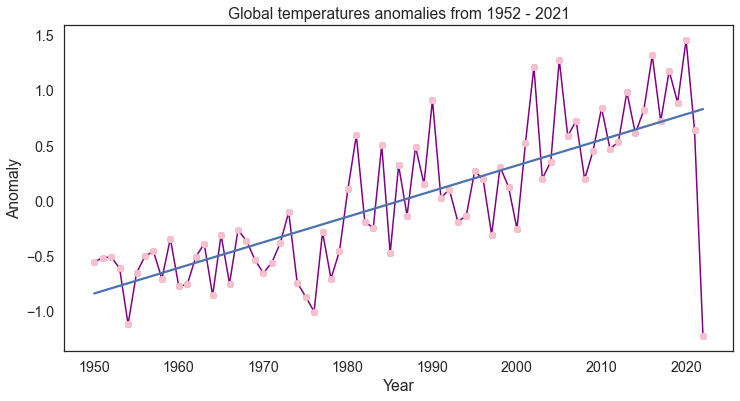

In [29]:
f, ax = plt.subplots(figsize=(12, 6))

glob.plot(hue='lat',marker="o",ax=ax,color="purple",markerfacecolor="pink",markeredgecolor="pink",label ='Mean temperature')
sns.regplot(x = "year",y = glob, ci = None,data = glob,label ='Trend line')

plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Global temperatures anomalies from 1952 - 2021')
plt.savefig('GlobalTempAnomalies.png')

## Plot of Global temperature anomaly shows how temperature has deviated from it's mean over time. 